In [58]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
import hypernetx as hnx
import numpy as np
import dionysus as dio
import HGZZ

from matplotlib import rc

np.random.seed(42)

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Forming a HG from a basic story


In [59]:

#this is currently how I am adding attributes to a hypergraph, but 
#I will need to change this depending on how it is defined later by HNX.
#specifically, I am making a dictionary of edges with attributes as another dictionary within the dictionary. meta.

DynHG = {0: [('A', 'C'),        {"time_stamps": [[1, 7]], 'name': 'E1'}],
         1: [('D', 'D'),        {"time_stamps": [[0, 0], [7,8]], 'name': 'E2'}],
         2: [('A', 'B'),        {"time_stamps": [[0, 1], [3,5]], 'name': 'E3'}],
         3: [('C', 'A', 'B'),   {"time_stamps": [[2, 3]], 'name': 'E4'}],
         4: [('B', 'C', 'D'),   {"time_stamps": [[4, 10]], 'name': 'E5'}]
         }

#get the edges ignoring the attributes.
num_of_edges = len(DynHG)
HG_edges = {i: DynHG[i][0] for i in range(len(DynHG))}
attributes = {i: DynHG[i][1] for i in range(len(DynHG))}
edge_names = {i: DynHG[i][1]['name'] for i in range(len(DynHG))}
interval_info = [DynHG[i][1]['time_stamps'] for i in range(len(DynHG))]
print(edge_names)

#define positions for plotting hypergraph.
pos = {'A': (0.0, 0.5),
       'B': (0.5, 1.0),
       'C': (0.5, 0.0),
       'D': (1.0, 0.5)}

H = hnx.Hypergraph(HG_edges)
print(HG_edges)

{0: 'E1', 1: 'E2', 2: 'E3', 3: 'E4', 4: 'E5'}
{0: ('A', 'C'), 1: ('D', 'D'), 2: ('A', 'B'), 3: ('C', 'A', 'B'), 4: ('B', 'C', 'D')}


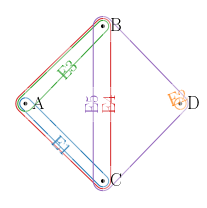

In [60]:
# Draw the hypergraph! For more on using all of the parameters
# of the draw function see the Visualization tutorial
plt.figure(figsize = (3,3))
TextSize =18
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10
edges = np.sort([item for sublist in list(H.s_components(edges=True)) for item in sublist])
hnx.draw(H, pos, with_color = True, 
         edges_kwargs = {'edgecolors': np.array(colors)[edges]}, 
         with_node_labels = True, 
         with_edge_labels = True,
         edge_labels_kwargs = {'fontsize': TextSize},
         node_labels_kwargs = {'fontsize': TextSize},
         edge_labels = edge_names)

plt.tight_layout()
plt.savefig('figures/example_temporal_HG.png', dpi = 600)
plt.show()

In [61]:
nodes = []
H_full = H
for i, node in enumerate(H_full.nodes()):
    nodes.append([i, node])
    print(i, node)

0 A
1 C
2 D
3 B


### Dual

In [ ]:
HG_dual = H_full.dual()
np.random.seed(40)
plt.figure(figsize = (3,3))
hnx.draw(HG_dual, node_labels = edge_names)
plt.tight_layout()
plt.savefig('figures/example_temporal_HG_dual.png', dpi = 600)
plt.show()

nodes_dual = []
for i, node in enumerate(HG_dual.nodes()):
    dual_node_name = edge_names[int(str(node))]
    nodes_dual.append(dual_node_name)
    

### Linegraph of THG

In [ ]:
import hypernetx.algorithms.hypergraph_modularity as hmod
import networkx as nx
import igraph as ig
LG = hmod.two_section(HG_dual)
LG = LG.to_networkx()


node_names = {key: DynHG[key][1]['name'] for key in DynHG}
np.random.seed(41)
plt.figure(figsize = (5,5))
nx.draw(LG, with_labels = True, labels=node_names, node_size = 3500, 
        font_size = 14, node_color = 'lightblue', width = 2)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

# Get hypergraphs at each window

In [ ]:
edge_times = HGZZ.get_edges_times(DynHG)
print(edge_times)

Get times of interest

In [ ]:

all_times = [item for sublist in edge_times for item in sublist]
all_times = [item for sublist in all_times for item in sublist]
ts = np.sort(np.unique(all_times))
ts_range = ts[-1] - ts[0]
ts = np.append(ts, ts[-1]+0.05*ts_range) #add one more time at end equivalent to infinite time.


#ts_shift = np.append(ts[1:], 0) - ts
#windows = np.array([ts, ts+ts_shift]).T
window_width = 2
ts_xticks = np.arange(min(ts), max(ts), 1)
ts = np.arange(min(ts), max(ts), window_width)
ts = ts[:-1]
print(ts)
print(ts_xticks)
shift = 2
windows = np.array([ts, ts+shift]).T
unions = True
if unions == True:
    windows_all = []
    for i, window in enumerate(windows):
        windows_all.append(list(window))
        if i < len(windows)-1:
            windows_all.append(list([window[0], windows[i+1][1]]))
windows = list(windows_all)
print('windows:')
print(windows)
# or get HGs based on defined windows
HGs = HGZZ.get_HGs_at_windows(edge_times, windows, HG_edges, toplex = False)

In [ ]:
TextSize = 18
LW = 3
plt.figure(figsize=(15,3.5))
x_positions = 1*len(HGs) + 1
ts_range = max(ts) - min(ts)
import random
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10

infinity_ratio = 1.2
for i in range(len(edge_times)):
    edge_num = i
    time_ranges = edge_times[i]
    for j, t in enumerate(time_ranges):
        print(time_ranges[j])
        plt.plot([time_ranges[j][0], time_ranges[j][1]], [edge_num, edge_num], 
                 color = colors[i], linewidth = LW)
        plt.plot([time_ranges[j][0], time_ranges[j][1]], [edge_num, edge_num], 'ko')
        
plt.grid()
plt.xlabel('Time', fontsize = TextSize)
plt.ylabel('Edge', fontsize = TextSize)
ts_pos = list(ts_xticks)
ts_pos.append(ts_xticks[-1] + window_width)
ts_pos = np.array(ts_pos)
ts_labels = (ts_pos.astype(int)).astype(str)
plt.xticks(ts_pos, ts_labels, fontsize = TextSize, rotation=0)
y_labels = [edge_names[i] for i in range(len(edge_names))]
plt.yticks(np.arange(len(edge_names)), y_labels, fontsize = TextSize)
plt.xlim(min(windows[0])-0.05*ts_range, max(windows[-1])+0.05*ts_range)
plt.ylim(-0.5, num_of_edges-0.5)

plt.subplots_adjust(wspace= 0.5)
#plt.subplots_adjust(hspace= 0.3)
plt.savefig('figures/HG_intervals_minimal_example.png', dpi = 500, bbox_inches="tight")
plt.show()

In [ ]:
def check_if_in(point, interval):
    if point >= interval[0] and point <= interval[1]:
        return True
    else:
        return False
    
t_crit_points = np.arange(min(windows[0]), max(windows[-1])+1, 1)
trace = []
for t_crit_point in t_crit_points:
    count = 0
    for i, intervals in enumerate(interval_info):
        for interval in intervals:
            if check_if_in(t_crit_point, interval) == True:
                count += 1
    trace.append(count)
print(trace)

    

plt.figure(figsize=(8, 2.0))
plt.plot(t_crit_points, trace, 'ko')
plt.plot(t_crit_points, trace, 'k')
plt.xlabel('Time', fontsize = TextSize)
plt.ylabel('Trace', fontsize = TextSize)
plt.xticks(ts_pos, ts_labels, fontsize = TextSize, rotation=0)
plt.yticks([0, 1, 2, 3], [0, 1, 2, 3], fontsize = TextSize, rotation=0)
plt.ylim(0, 3.5)
plt.xlim(-0.3, 10.3)
plt.grid()
plt.tight_layout()
plt.savefig('figures/minimal_example_trace.png', dpi = 400)
plt.show()


In [ ]:
TextSize = 18
LW = 3
plt.figure(figsize=(8,4))
gs = gridspec.GridSpec(2, 1)

x_positions = 1*len(HGs) + 1
ts_range = max(ts) - min(ts)
import random
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10



ax = plt.subplot(gs[0, 0]) 
infinity_ratio = 1.2
for i in range(len(edge_times)):
    edge_num = i
    time_ranges = edge_times[i]
    for j, t in enumerate(time_ranges):
        print(time_ranges[j])
        plt.plot([time_ranges[j][0], time_ranges[j][1]], [edge_num, edge_num], 
                 color = colors[i], linewidth = LW)
        plt.plot([time_ranges[j][0], time_ranges[j][1]], [edge_num, edge_num], 'ko')
plt.grid()
plt.ylabel('Edge', fontsize = TextSize)
ts_pos = list(ts_xticks)
ts_pos.append(ts_xticks[-1] + window_width)
ts_pos = np.array(ts_pos)
ts_labels = (ts_pos.astype(int)).astype(str)
plt.xticks(ts_pos, ['']*len(ts_pos), fontsize = TextSize, rotation=0)
y_labels = [edge_names[i] for i in range(len(edge_names))]
plt.yticks(np.arange(len(edge_names)), y_labels, fontsize = TextSize)
plt.xlim(-0.3, 10.3)
plt.ylim(-0.5, num_of_edges-0.5)


ax = plt.subplot(gs[1, 0]) 
plt.plot(t_crit_points, trace, 'ko')
plt.plot(t_crit_points, trace, 'k')
plt.xlabel('Time', fontsize = TextSize)
plt.ylabel('Trace', fontsize = TextSize)
plt.xticks(ts_pos, ts_labels, fontsize = TextSize, rotation=0)
plt.yticks([0, 1, 2, 3], [0, 1, 2, 3], fontsize = TextSize, rotation=0)
plt.ylim(0, 3.5)
plt.xlim(-0.3, 10.3)
plt.grid()
plt.tight_layout()


plt.subplots_adjust(wspace= 0.5)
#plt.subplots_adjust(hspace= 0.3)
plt.savefig('figures/HG_intervals_and_trace_minimal_example.png', dpi = 500, bbox_inches="tight")
plt.show()

In [ ]:
TextSize = 18
plt.figure(figsize=(int(1.5*len(HGs)),4))
x_positions = 1*len(HGs) + 1
gs = gridspec.GridSpec(2, x_positions)
ts_range = max(ts) - min(ts)
import random
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10
for i in range(len(HGs)):
    H_i = HGs[i]
    edges = []
    if len(H_i) > 0:
        edges = np.sort([item for sublist in list(H_i.s_components(edges=True)) for item in sublist])
        
    y_pos = 1
    if i%2 == 1: y_pos = 0
    x_pos = i
    
    ax = plt.subplot(gs[y_pos, x_pos]) #plot time series
    x = i/2
    if i%2 == 0: x = int(x)
    plt.title('$W_{'+str(x)+'}$: ['+str(int(windows[i][0]))+'-'+str(int(windows[i][1]))+']', 
              fontsize = TextSize, y = 0.82)
    
    hnx.draw(H_i, pos, with_color = True, 
             edges_kwargs = {'edgecolors': np.array(colors)[edges]}, 
             with_node_labels = False, 
             with_edge_labels = False)
    if i == 1:
        plt.xlim(-0.15, 1.1)
        plt.ylim(-0.3, 1.5)
    else:
        plt.xlim(-0.15, 1.1)
        plt.ylim(-0.15, 1.3)
    
    if y_pos == 1:
        if x_pos != 0:
            ax.arrow(x = 0.25, y = 1.95, dx = -0.3, dy = 0.3, clip_on = False, width = 0.03)
        if x_pos != len(HGs)-1:
            ax.arrow(x = 0.75, y = 1.95, dx = 0.3, dy = 0.3, clip_on = False, width = 0.03)

plt.subplots_adjust(wspace= -0.15)
#plt.subplots_adjust(hspace= 0.3)
plt.tight_layout()
plt.savefig('figures/THG_snapshots_minimal_example.png', dpi = 400)
plt.show()

In [ ]:
TextSize = 18
plt.figure(figsize=(int(1.5*len(HGs)),4))
x_positions = 1*len(HGs) 
gs = gridspec.GridSpec(2, x_positions)
ts_range = max(ts) - min(ts)
import random
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10
for i in range(len(HGs)):
    H_i = HGs[i]
    edges = []
    if len(H_i) > 0:
        edges = np.sort([item for sublist in list(H_i.s_components(edges=True)) for item in sublist])
        
    y_pos = 1
    if i%2 == 1: y_pos = 0
    x_pos = i
    
    ax = plt.subplot(gs[y_pos, x_pos]) #plot time series
    x = int(i/2)
    if i%2 == 0: 
        title = ' $K_{'+str(x)+'}$'
    else:
        x = x+1
        title = '$K_{'+str(x-1)+','+str(x)+'}$'
    plt.title(title,fontsize = TextSize+3)
    
    
    hnx.draw(H_i, pos, with_color = True, 
             edges_kwargs = {'edgecolors': np.array(colors)[edges]}, 
             with_node_labels = False, 
             with_edge_labels = False)

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    
    ax = plt.subplot(gs[y_pos-1, x_pos]) #plot time series
    if y_pos == 1:
        y_base = -0.5
        if x_pos != 0:
            ax.arrow(x = 0.25, y = y_base, 
                     dx = -0.3, dy = 0.3, clip_on = False, width = 0.03)
        if x_pos != len(HGs)-1:
            ax.arrow(x = 0.75, y = y_base, 
                     dx = 0.3, dy = 0.3, clip_on = False, width = 0.03)
    plt.axis('off')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    
plt.tight_layout()
plt.savefig('figures/H_THG_snapshots_minimal_example.png', dpi = 400)
plt.show()

[1, 7]
[0, 0]
[7, 8]
[0, 1]
[3, 5]
[2, 3]
[4, 10]


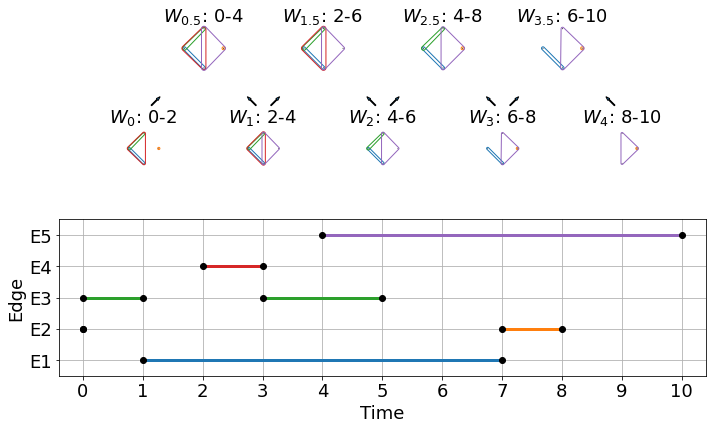

In [14]:
TextSize = 18
plt.figure(figsize=(int(1.2*len(HGs)),6))
delta_pos = 1
x_positions = 1*len(HGs) + 1 + delta_pos
gs = gridspec.GridSpec(4, x_positions)
ts_range = max(ts) - min(ts)
import random
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10
ax = plt.subplot(gs[0, 1]) #plot time series
plt.axis('off')

for i in range(len(HGs)):
    H_i = HGs[i]
    edges = []
    if len(H_i) > 0:
        edges = np.sort([item for sublist in list(H_i.s_components(edges=True)) for item in sublist])

    y_pos = 1
    if i%2 == 1: y_pos = 0
    x_pos = i

    ax = plt.subplot(gs[y_pos, x_pos+delta_pos]) #plot time series
    x = i/2
    if i%2 == 0: x = int(x)
    plt.title('$W_{'+str(x)+'}$: '+str(int(windows[i][0]))+'-'+str(int(windows[i][1])), 
              fontsize = TextSize, y = 0.82)

    hnx.draw(H_i, pos, with_color = True, 
             edges_kwargs = {'edgecolors': np.array(colors)[edges]}, 
             with_node_labels = False, 
             with_edge_labels = False)
    if i == 1:
        plt.xlim(-0.15, 1.1)
        plt.ylim(-0.15, 1.3)
    else:
        plt.xlim(-0.15, 1.1)
        plt.ylim(-0.15, 1.3)

    if y_pos == 1:
        if x_pos != 0:
            ax.arrow(x = 0.25, y = 1.95, dx = -0.2, dy = 0.2, clip_on = False, width = 0.03)
        if x_pos != len(HGs)-1:
            ax.arrow(x = 0.75, y = 1.95, dx = 0.2, dy = 0.2, clip_on = False, width = 0.03)


TextSize = 18
LW = 3
ax = plt.subplot(gs[2:4, 0:x_positions]) #plot time series
x_positions = 1*len(HGs) + 1
ts_range = max(ts) - min(ts)
import random
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10

infinity_ratio = 1.2
for i in range(len(edge_times)):
    edge_num = i
    time_ranges = edge_times[i]
    for j, t in enumerate(time_ranges):
        print(time_ranges[j])
        plt.plot([time_ranges[j][0], time_ranges[j][1]], [edge_num, edge_num], 
                 color = colors[i], linewidth = LW)
        plt.plot([time_ranges[j][0], time_ranges[j][1]], [edge_num, edge_num], 'ko')
plt.grid()
plt.xlabel('Time', fontsize = TextSize)
plt.ylabel('Edge', fontsize = TextSize)
plt.xticks(ts_pos, ts_labels, fontsize = TextSize, rotation=0)
y_labels = [edge_names[i] for i in range(len(edge_names))]
plt.yticks(np.arange(len(edge_names)), y_labels, fontsize = TextSize)
plt.xlim(min(windows[0])-0.05*ts_range, max(windows[-1])+0.05*ts_range)

plt.ylim(-0.5, num_of_edges-0.5)

plt.subplots_adjust(wspace= -0.15)
plt.subplots_adjust(hspace= -0.10)
plt.tight_layout()
plt.savefig('figures/THG_snapshots_with_intervals.png', dpi = 400)
plt.show()

[4.0, 6.0]
[Entity(0,['A', 'C'],{'weight': 1.0}), Entity(2,['A', 'B'],{'weight': 1.0}), Entity(4,['D', 'B', 'C'],{'weight': 1.0})]
{0: 'E1', 1: 'E2', 2: 'E3', 3: 'E4', 4: 'E5'}
[1, 7]
[0, 0]
[7, 8]
[0, 1]
[3, 5]
[2, 3]
[4, 10]


/var/folders/yv/3wvbvz090f9dmdt4jkh6ljcw0000gn/T/ipykernel_52910/364026706.py:62: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


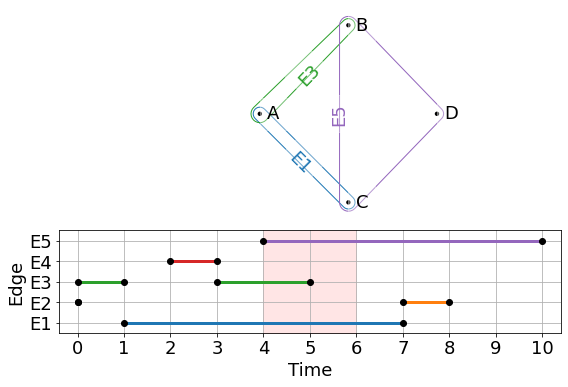

In [15]:
TextSize = 18
plt.figure(figsize=(int(1.2*len(HGs)),6))
delta_pos = 20
x_positions = 1*len(HGs) + 1 + delta_pos
gs = gridspec.GridSpec(6, x_positions)
ts_range = max(ts) - min(ts)
import random
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10
ax = plt.subplot(gs[0, 1]) #plot time series
plt.axis('off')

i = 4
H_i = HGs[i]
edges = []
if len(H_i) > 0:
    edges = np.sort([item for sublist in list(H_i.s_components(edges=True)) for item in sublist])
x_pos = i
print(windows[i])
edge_names = {key: DynHG[key][1]['name'] for key in DynHG}
print(list(H_i.edges()))
print(edge_names)
ax = plt.subplot(gs[0:4, x_pos+9: x_pos+20]) #plot time series
hnx.draw(H_i, pos, with_color = True, 
         edges_kwargs = {'edgecolors': np.array(colors)[edges]}, 
         with_node_labels = True, 
         with_edge_labels = True,
         edge_labels_kwargs = {'fontsize': TextSize},
         node_labels_kwargs = {'fontsize': TextSize},
         edge_labels = edge_names)

    

TextSize = 18
LW = 3
ax = plt.subplot(gs[4:6, 3:x_positions]) #plot time series
plt.fill_between(windows[i], [-0.5, -0.5], [len(H.edges)+1.5, len(H.edges)+1.5], 
                alpha = 0.1, color = 'red')
x_positions = 1*len(HGs) + 1
ts_range = max(ts) - min(ts)
import random
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10

infinity_ratio = 1.2
for i in range(len(edge_times)):
    edge_num = i
    time_ranges = edge_times[i]
    for j, t in enumerate(time_ranges):
        print(time_ranges[j])
        plt.plot([time_ranges[j][0], time_ranges[j][1]], [edge_num, edge_num], 
                 color = colors[i], linewidth = LW)
        plt.plot([time_ranges[j][0], time_ranges[j][1]], [edge_num, edge_num], 'ko')
plt.grid()
plt.xlabel('Time', fontsize = TextSize)
plt.ylabel('Edge', fontsize = TextSize)
plt.xticks(ts_pos, ts_labels, fontsize = TextSize, rotation=0)
y_labels = [edge_names[i] for i in range(len(edge_names))]
plt.yticks(np.arange(len(edge_names)), y_labels, fontsize = TextSize)
plt.xlim(min(windows[0])-0.05*ts_range, max(windows[-1])+0.05*ts_range)
plt.ylim(-0.5, num_of_edges-0.5)


plt.tight_layout()
plt.savefig('figures/THG_window_snapshot_with_intervals.png', dpi = 400)
plt.show()

# Forming ABS from HGs

In [16]:
MD = 3
S, S_dict = HGZZ.ASC_from_HG(H, max_dim = MD)
print(S_dict[0])

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}


# Run zigzag filtration on simplicial complex with time indices

First need to get list of time indices for where simplices appear and disappear.



In [17]:
ts_all = []
for i, window in enumerate(windows):
    #ts_all.append(np.mean(window))
    ts_all.append(i/2)
print(ts_all)
print('')

T = HGZZ.get_simplex_times(HGs, S, S_dict, np.array(ts_all), max_dim = MD)

print(windows)
print('')
for i in range(len(S)):
    print(S[i], '-----', T[i])

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

[[0.0, 2.0], [0.0, 4.0], [2.0, 4.0], [2.0, 6.0], [4.0, 6.0], [4.0, 8.0], [6.0, 8.0], [6.0, 10.0], [8.0, 10.0]]

[0, 1, 2] ----- [0.0, 2.0]
[0] ----- [0.0, 4.0]
[1] ----- [0.0]
[2] ----- [0.0]
[0, 1] ----- [0.0, 3.0]
[0, 2] ----- [0.0, 4.0]
[1, 2] ----- [0.0]
[1, 2, 3] ----- [0.5]
[3] ----- [0.0]
[1, 3] ----- [0.5]
[2, 3] ----- [0.5]


In [18]:
f = dio.Filtration(S)
zz, dgms, cells = dio.zigzag_homology_persistence(f, T)

In [19]:
draw_zigzag_module = True
if draw_zigzag_module == True:
    Ss = []
    S_dicts = []
    for HG_i in HGs:
        S_i, S_dict_i = HGZZ.ASC_from_HG(HG_i, max_dim = MD)
        Ss.append(S_i)
        S_dicts.append(S_dict_i)

0 1
[[1], [0], [2], [3], [0, 2], [0, 3], [2, 3], [0, 2, 3]]
1 0
[[0], [1], [2], [3], [0, 1], [0, 2], [1, 2], [1, 3], [2, 3], [0, 1, 2], [1, 2, 3]]
2 1
[[0], [1], [2], [3], [0, 1], [0, 2], [1, 2], [1, 3], [2, 3], [0, 1, 2], [1, 2, 3]]
3 0
[[0], [1], [2], [3], [0, 1], [0, 2], [1, 2], [1, 3], [2, 3], [0, 1, 2], [1, 2, 3]]
4 1
[[0], [2], [1], [3], [0, 2], [0, 1], [1, 2], [1, 3], [2, 3], [1, 2, 3]]
5 0
[[0], [2], [1], [3], [0, 2], [0, 1], [1, 2], [1, 3], [2, 3], [1, 2, 3]]
6 1
[[0], [2], [1], [3], [0, 2], [1, 2], [1, 3], [2, 3], [1, 2, 3]]
7 0
[[0], [2], [1], [3], [0, 2], [1, 2], [1, 3], [2, 3], [1, 2, 3]]
8 1
[[0], [1], [2], [0, 1], [0, 2], [1, 2], [0, 1, 2]]


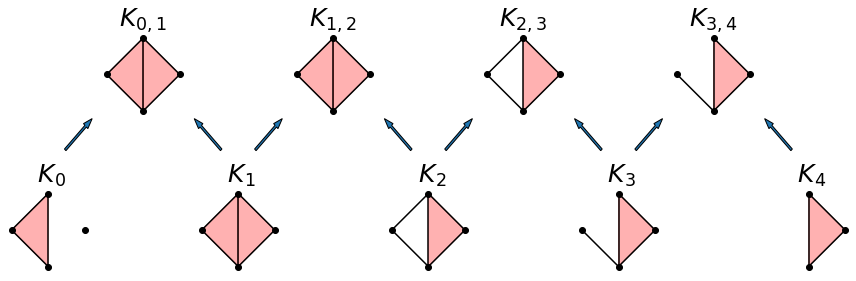

In [20]:
TextSize = 18
plt.figure(figsize=(int(1.4*len(HGs)),4))
x_positions = 1*len(HGs)
gs = gridspec.GridSpec(2, x_positions)
for i, S_i in enumerate(Ss):
    y_pos = 1
    if i%2 == 1: y_pos = 0
    x_pos = i
    
    print(x_pos, y_pos)
    ax = plt.subplot(gs[y_pos, x_pos]) #plot time series
    
    S_i.sort(key=len)
    S_dict_i = S_dicts[i]
    print(S_i)
    for s in S_i:
        if len(s) == 1: #draw point
            node = S_dict_i[0][s[0]]
            point = pos[node]
            plt.plot(point[0], point[1], 'ko')
        if len(s) == 2: #draw line
            edge = tuple(s)
            line = []
            for s_i in edge:
                line.append(pos[S_dict_i[0][s_i]])
            line = np.array(line).T
            plt.plot(line[0], line[1], 'k')
            #plt.plot(point[0], point[1], 'ko')
        if len(s) == 3: #draw face
            face = tuple(s)
            tri = []
            for s_i in face:
                tri.append(pos[S_dict_i[0][s_i]])
            tri = np.array(tri).T
            plt.fill(tri[0], tri[1], color = 'r', alpha = 0.3)
    plt.axis('off')
    x = int(i/2)
    if i%2 == 0: 
        title = ' $K_{'+str(x)+'}$'
    else:
        x = x+1
        title = '$K_{'+str(x-1)+','+str(x)+'}$'
    plt.title(title,fontsize = TextSize+7, y = 0.9)
    plt.xlim(-0.06, 1.06)
    plt.ylim(-0.1, 1.2)
    
    ax = plt.subplot(gs[y_pos-1, x_pos]) #plot time series
    if y_pos == 1:
        y_base = -0.5
        if x_pos != 0:
            ax.arrow(x = 0.25, y = y_base, 
                     dx = -0.3, dy = 0.3, clip_on = False, width = 0.03)
        if x_pos != len(HGs)-1:
            ax.arrow(x = 0.75, y = y_base, 
                     dx = 0.3, dy = 0.3, clip_on = False, width = 0.03)
    plt.axis('off')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    
plt.tight_layout()
plt.savefig('figures/K_THG_snapshots_minimal_example.png', dpi = 400)
plt.show()

# Plot resulting ZZ persistence

In [21]:
for i,dgm in enumerate(dgms):
    print("Dimension:", i)
    for j, p in enumerate(dgm):
        print(p)


Dimension: 0
(0,0.5)
(0,inf)
Dimension: 1
(2,3)


In [56]:

def plot_barcode(dgms, x_locs, x_vals, fontsize = 18, dimensions = [0,1], save = None):
    ts_xticks = np.copy(x_locs)
    max_val = np.max(np.array(x_locs).astype(float))
    plt.figure(figsize=(5.5, 3.4))
    gs = gridspec.GridSpec(len(dimensions), 1)
    for i,dgm in enumerate(dgms):
        ax = plt.subplot(gs[i, 0]) #plot time series
        label = r"$D_" + str(i) +"$"
        plt.ylabel(label, fontsize = fontsize)
        line_styles = ['g', 'b', 'r', 'c']
        for j, p in enumerate(dgm):
            #this is really stupid but the dionysus point p is not a subsctiptable object.
            pair = (str(p)[1:-1]).split(",")
            pair = [float(pair[0]), float(pair[1])]
            if pair[1] == np.inf: pair[1] = max_val
            plt.plot(pair, [j, j], line_styles[i])
            print(pair)
        plt.yticks([])
        if i == len(dimensions)-1:
            plt.xticks(x_locs, x_vals, fontsize = fontsize, rotation=0)
            #plt.xticks(ts_pos, ts_labels, fontsize = TextSize, rotation=0)
        else:
            plt.xticks(x_locs, ['']*len(x_locs), fontsize = fontsize, rotation=0)
            #plt.xticks(ts_pos, labels = ['']*len(ts_pos), fontsize = TextSize, rotation=0)
        ts_range = max(np.array(x_locs).astype(float)) - min(np.array(x_locs).astype(float))
        r = 0.039
        plt.xlim(min(np.array(ts).astype(float))-r*ts_range, 
                 max_val+r*ts_range)
        plt.grid()
        plt.ylim(-0.5, j+0.5)
        plt.plot([max_val, max_val], [-10,10], 'r--')
        
        #plt.plot([max_val, max_val], [-1,j+1], 'r:')

    plt.xlabel('Index', fontsize = fontsize)
    plt.subplots_adjust(hspace= 0.1)
    plt.tight_layout()
    if save != None:
        plt.savefig(save, dpi = 400)
    plt.show()

['0', '0,1', '1', '1,2', '2', '2,3', '3', '3,4', '4', '$\\infty$']
[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
[0.0, 0.5]
[0.0, 4.5]
[2.0, 3.0]


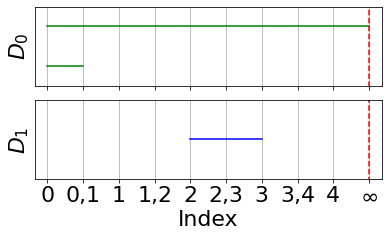

In [57]:
x_labels = []
x_locations = []
for t in ts_all:
    if t%1 == 0:
        x_locations.append(t)
        x_labels.append(str(int(t)))
    else:
        x_locations.append(t)
        x_labels.append(str(int(t)) + ',' + str(int(t+1)))
x_locations.append(t+0.5)
x_labels.append(r'$\infty$')
print(x_labels)
print(x_locations)


plot_barcode(dgms, x_locations, x_labels, fontsize = TextSize + 4, 
             save = 'figures/bar_code_example_minimal.png')


# Make GIF

In [24]:
make_gif = False

In [25]:
if make_gif == True:

    for frame in range(len(windows)):

        TextSize = 18
        plt.figure(figsize=(int(1.2*len(HGs)),8))
        delta_pos = 1
        x_positions = 1*len(HGs) + 1 + delta_pos
        gs = gridspec.GridSpec(4, x_positions)
        ts_range = max(ts) - min(ts)
        import random
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10
        ax = plt.subplot(gs[0, 1]) #plot time series
        plt.axis('off')

        for i in range(frame+1):
            H_i = HGs[i]
            edges = []
            if len(H_i) > 0:
                edges = np.sort([item for sublist in list(H_i.s_components(edges=True)) for item in sublist])

            y_pos = 1
            if i%2 == 1: y_pos = 0
            x_pos = i

            ax = plt.subplot(gs[y_pos, x_pos+delta_pos]) #plot time series
            x = i/2
            if i%2 == 0: x = int(x)
            plt.title('$W_{'+str(x)+'}$: '+str(int(windows[i][0]))+'-'+str(int(windows[i][1])), 
                      fontsize = TextSize, y = 0.82)

            hnx.draw(H_i, pos, with_color = True, 
                     edges_kwargs = {'edgecolors': np.array(colors)[edges]}, 
                     with_node_labels = False, 
                     with_edge_labels = False)
            if i == 1:
                plt.xlim(-0.15, 1.1)
                plt.ylim(-0.55, 1.65)
            else:
                plt.xlim(-0.15, 1.1)
                plt.ylim(-0.15, 1.3)

            if y_pos == 1:
                if x_pos != 0:
                    ax.arrow(x = 0.25, y = 1.95, dx = -0.2, dy = 0.2, clip_on = False, width = 0.03)
                if x_pos != len(HGs)-1:
                    ax.arrow(x = 0.75, y = 1.95, dx = 0.2, dy = 0.2, clip_on = False, width = 0.03)


        TextSize = 18
        LW = 3
        ax = plt.subplot(gs[2:3, 0:x_positions]) #plot time series
        x_positions = 1*len(HGs) + 1
        ts_range = max(ts) - min(ts)
        import random
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10

        infinity_ratio = 1.2
        for i in range(len(edge_times)):
            edge_num = i
            time_ranges = edge_times[i]
            for j, t in enumerate(time_ranges):
                if j%2 == 0:
                    if j+1 == len(time_ranges):
                        plt.plot([t, infinity_ratio*ts_range], [edge_num, edge_num], 
                                 color = colors[i], linewidth = LW)
                        plt.plot([t, 1.2*ts_range], [edge_num, edge_num], 'ko')
                    else:
                        plt.plot([time_ranges[j], time_ranges[j+1]], [edge_num, edge_num], 
                                 color = colors[i], linewidth = LW)
                        plt.plot([time_ranges[j], time_ranges[j+1]], [edge_num, edge_num], 'ko')
        plt.grid()
        plt.xlabel('Time', fontsize = TextSize)
        plt.ylabel('Edge', fontsize = TextSize)
        plt.xticks(ts_pos, ts_labels, fontsize = TextSize, rotation=0)
        y_labels = [edge_names[i] for i in range(len(edge_names))]
        plt.yticks(np.arange(len(edge_names)), y_labels, fontsize = TextSize)
        plt.xlim(min(windows[0])-0.05*ts_range, max(windows[-1])+0.05*ts_range)

        if frame%2==0:
            plt.fill_between(windows[frame], [-0.5, -0.5], [len(edges)+1.5, len(edges)+1.5], 
                             alpha = 0.1, color = 'red')
        else:
            plt.fill_between(windows[frame], [-0.5, -0.5], [len(edges)+1.5, len(edges)+1.5], 
                             alpha = 0.1, color = 'blue')

        plt.ylim(-0.5, num_of_edges-0.5)

        plt.subplots_adjust(wspace= -0.15)
        plt.subplots_adjust(hspace= -0.10)
        plt.savefig('frames/frame'+str(frame)+'.png', dpi = 500, bbox_inches="tight")
        plt.show()

In [26]:

if make_gif == True:

    for frame in range(len(windows)):

        TextSize = 18
        plt.figure(figsize=(int(1.2*len(HGs)),8))
        delta_pos = 1
        x_positions = 1*len(HGs) + 1 + delta_pos
        gs = gridspec.GridSpec(4, x_positions)
        ts_range = max(ts) - min(ts)
        import random
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10
        ax = plt.subplot(gs[0, 1]) #plot time series
        plt.axis('off')

        for i in range(frame+1):
            H_i = HGs[i]
            edges = []
            if len(H_i) > 0:
                edges = np.sort([item for sublist in list(H_i.s_components(edges=True)) for item in sublist])

            y_pos = 1
            if i%2 == 1: y_pos = 0
            x_pos = i

            ax = plt.subplot(gs[y_pos, x_pos+delta_pos]) #plot time series
            x = i/2
            if i%2 == 0: x = int(x)
            plt.title('$W_{'+str(x)+'}$: '+str(int(windows[i][0]))+'-'+str(int(windows[i][1])), 
                      fontsize = TextSize, y = 0.82)

            hnx.draw(H_i, pos, with_color = True, 
                     edges_kwargs = {'edgecolors': np.array(colors)[edges]}, 
                     with_node_labels = False, 
                     with_edge_labels = False)
            if i == 1:
                plt.xlim(-0.15, 1.1)
                plt.ylim(-0.55, 1.65)
            else:
                plt.xlim(-0.15, 1.1)
                plt.ylim(-0.15, 1.3)

            if y_pos == 1:
                if x_pos != 0:
                    ax.arrow(x = 0.25, y = 1.95, dx = -0.2, dy = 0.2, clip_on = False, width = 0.03)
                if x_pos != len(HGs)-1:
                    ax.arrow(x = 0.75, y = 1.95, dx = 0.2, dy = 0.2, clip_on = False, width = 0.03)


        TextSize = 18
        LW = 3
        ax = plt.subplot(gs[2:3, 0:x_positions]) #plot time series
        x_positions = 1*len(HGs) + 1
        ts_range = max(ts) - min(ts)
        import random
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10

        infinity_ratio = 1.2
        for i in range(len(edge_times)):
            edge_num = i
            time_ranges = edge_times[i]
            for j, t in enumerate(time_ranges):
                if j%2 == 0:
                    if j+1 == len(time_ranges):
                        plt.plot([t, infinity_ratio*ts_range], [edge_num, edge_num], 
                                 color = colors[i], linewidth = LW)
                        plt.plot([t, 1.2*ts_range], [edge_num, edge_num], 'ko')
                    else:
                        plt.plot([time_ranges[j], time_ranges[j+1]], [edge_num, edge_num], 
                                 color = colors[i], linewidth = LW)
                        plt.plot([time_ranges[j], time_ranges[j+1]], [edge_num, edge_num], 'ko')
        plt.grid()
        #plt.xlabel('Time', fontsize = TextSize)
        plt.ylabel('Edge', fontsize = TextSize)
        plt.xticks(ts_pos, ['']*len(ts_pos), fontsize = TextSize, rotation=0)
        y_labels = [edge_names[i] for i in range(len(edge_names))]
        plt.yticks(np.arange(len(edge_names)), y_labels, fontsize = TextSize)
        plt.xlim(min(windows[0])-0.05*ts_range, max(windows[-1])+0.05*ts_range)
        if frame%2==0:
            plt.fill_between(windows[frame], [-0.5, -0.5], [5.5, 5.5], 
                             alpha = 0.1, color = 'red')
        else:
            plt.fill_between(windows[frame], [-0.5, -0.5], [5.5, 5.5], 
                             alpha = 0.1, color = 'blue')
        plt.ylim(-0.5, num_of_edges-0.5)

        plt.subplots_adjust(wspace= -0.15)
        plt.subplots_adjust(hspace= -0.10)
        plt.savefig('frames/frame'+str(frame)+'.png', dpi = 500, bbox_inches="tight")
        plt.show()

In [27]:

if make_gif == True:
    
    import imageio
    images = []
    for i in range(7):
        images.append(imageio.imread('frames/frame'+str(i)+'.png'))
    imageio.mimsave('frames/THGZZ_windowing.gif', images, fps = 1)


# Interval Graph

In [28]:
edge_times = HGZZ.get_edges_times(DynHG)
print(edge_times)

[[[1, 7]], [[0, 0], [7, 8]], [[0, 1], [3, 5]], [[2, 3]], [[4, 10]]]


In [29]:
def get_intervals(times):
    intervals_i = []
    for i, time in enumerate(times):
        if i%2 == 0:
            if i < len(times)-1:
                intervals_i.append([time, times[i+1]])
            else:
                intervals_i.append([time, np.Inf])
    return intervals_i

intervals = []
for times in edge_times:
    intervals.append(get_intervals(times))
for interval_set in intervals:
    print(interval_set)

[[[1, 7], inf]]
[[[0, 0], [7, 8]]]
[[[0, 1], [3, 5]]]
[[[2, 3], inf]]
[[[4, 10], inf]]


In [30]:
def get_interval_overlap_status(a, b):
    # a and b are closed intervals
    overlap_status = False
    
    overlap = max(0, min(a[1], b[1]) - max(a[0], b[0]))
    if overlap > 0:
        overlap_status = True
    if a[1] == b[0] or a[0] == b[1]:
        overlap_status = True
    if a[0] == a[1]: #if a is point instead of interval
        if a[0] >= b[0] and a[1] <= b[1]:
            overlap_status = True
    if b[0] == b[1]: #if a is point instead of interval
        if b[0] >= a[0] and b[1] <= a[1]:
            overlap_status = True
            
    return overlap_status

In [31]:
edges = []
for i, intervals_i in enumerate(intervals):
    #print(str(np.round(100*i/N,5)) + '% complete', end = '\r', flush = True)
    for j, intervals_j in enumerate(intervals):
        for I_i in intervals_i:
            for I_j in intervals_j:
                overlap = get_interval_overlap_status(I_i, I_j)
                if overlap == True and i != j:
                    edges.append([i,j])
edges = np.array(edges)

TypeError: unsupported operand type(s) for -: 'float' and 'list'

In [ ]:
G = nx.Graph()
for i, edge in enumerate(edges):
    print(str(np.round(100*i/len(edges),5)) + '% complete', end = '\r', flush = True)
    G.add_node(edge[0], label = DynHG[edge[0]][1]['name'], intervals = intervals[edge[0]], color = 'red')
    G.add_node(edge[1], label = DynHG[edge[1]][1]['name'], intervals = intervals[edge[1]], color = 'red')
    G.add_edge(edge[0], edge[1])

In [ ]:
np.random.seed(42)
pos = nx.spring_layout(G, k=5, iterations = 500)
labeldict = {key: DynHG[key][1]['name'] for key in DynHG}
colors_IG = []
for n in list(G.nodes()):
    colors_IG.append(colors[n])
II = [DynHG[i][1]['time_stamps'] for i in range(len(DynHG))]
print(II)
plt.figure(figsize = (7,4))
nx.draw(G, pos = pos, with_labels = False, labels=labeldict, node_size = 4000, 
        node_color = 'black', width = 0)
nx.draw(G, pos = pos, with_labels = True, labels=labeldict, node_size = 3500, 
        font_size = 14, node_color = colors_IG, width = 5)

plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.savefig('figures/interval_graph_minimal_example.png', dpi = 300)
plt.show()